# COGS 108 - Final Project 

# Overview

My results seem to suggest there is a strong correlation between calls for police and the amount of parks in the area. However, I believe that more analysis needs to be done as my code has some flaws and does not encompass exactly how far away these calls for police are from the parks. Though the close to zero amount of calls for police in the areas with San Diego parks shows strong evidence. 


# Name & GitHub

- Name: Christina Yu
- GitHub Username: teddybeargun

# Research Question

My research question is if San Diego parks deter crime in the area.

## Background and Prior Work

 I first thought of this topic, because it was something I heard about before. There seemed to be a belief that parks and recreation centers helped the community’s youths to commit less crimes. In the current studies, there seems to be both the reasoning that more crimes translate into less park and recreation center use, and less park and creation use translates into more crime. One of the papers on this topic states, “One gun-related violent crime per 10,000 people during the 6-month period prior to data collection was associated with an average of 13.5% to 15.8% reduction in observed park use and park-based moderate to vigorous physical activity (p<0.05) in the 6-month observation period” (Han, et al., 2018). According to this paper, even just one violent crime in an area decreases the use of parks. This study seems to suggest there is a clear link between parks and recreation centers and crime, however there are also other research that show that crime and violence are a small factor among many different factors.

There are also studies showing that more parks means an increase in crimes, “one 2015 study of multiple U.S. cities found that property crime rates are two to four times higher in neighborhoods near parks” (Ford, 2019). Some cities see parks and recreation centers as places for illegal activity to happen secretly, or places that give criminals access to victims that are most likely being less vigilant about their own safety. In one study, it notes that violent crime was “28% to 64% higher in neighborhoods adjacent to parks than in neighborhoods located a mile from the same parks” (Ford, 2019). However, according to the same study, more “green space” shows evidence of decreased crime rates. It appears that the type of park it is matters, instead of just the presence of a park. Due to this, I am curious about San Diego parks and if they deter criminal activity. If they do deter criminal activity, maybe it would point to San Diego parks having a greater amount of “green space” in their parks.


References (include links):
- 1) Ford, D. (2019, June 25). Can Parks Help Cities Fight Crime? Retrieved from https://news.ncsu.edu/2019/06/can-parks-help-fight-crime/

- 2) Han, B., Cohen, D., Derose, K., Li, J., & Williamson, S. (2018, January 12). Violent Crime and Park Use in Low-Income Urban Neighborhoods. Retrieved from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5818287/


# Hypothesis


My hypothesis is that San Diego parks will deter criminal activity. My reasoning for this is that I believe that San Diego parks have a lot of “green space”, having been to a few parks in San Diego before. And according to the studies I have found, there is a good amount of evidence to suggest that there is less crime when there is more “green space”.


# Dataset(s)

- Dataset Name: Park Locations Data
- Link to the dataset: https://data.sandiego.gov/datasets/park-locations/
- Number of observations: 57

The first dataset I will use is the geojson on San Diego park location. This file has the location of all parks in San Diego.

- Dataset Name: San Diego Crime Data
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 10000 randomly selected points

The second dataset I will use is the call for police dataset that shows every call for the police in 2019 and 2020. It contains incident number, date and time, the address, type of call, disposition, beat and the priority.

 I will combine them by mapping the call for police data to the San Diego park locations and see if they are in the same vicinity or not.

# Setup

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

I wanted to analyze my data by comparing the locations of parks with locations of calls for police. To do this, I started by reading in the files into jupyter notebooks. I then dropped the data I was not planning on using from the police dataset, as I only needed the beat and the priority columns. I needed the beat column to see where the criminal activity was taking place, and I needed the priority column as I wanted to see if the results changed depending on the severity of the criminal activity. I then randomly selected 10,000 data points from the police dataset, to lighten the load on my computing. I then checked if there was any missing data from these columns, and then sorted by priority and reset the index.
For the parks dataset, I dropped the columns I did not need and kept the column for park name, zip code, and geometry. I kept the park name to reference back to, in order to verify it was in the correct location, the zip code to reference with the beat area, and the geometry to see how it looked on a plot. 
After this, I tried to change the zip codes into beat areas.And then removed any beat areas from the police dataset that had a -1 for the value. 


In [2]:
## read the data
df_police = pd.read_csv('https://raw.githubusercontent.com/teddybeargun/individual_fa20/master/data/pd_calls_for_service_2019_datasd.csv')
police_shape = df_police.shape

## drop unneeded data, I only need the beat and priority
df_police = df_police[['beat', 'priority']]

## randomly select 10k data points
df_police = df_police.sample(n=10000)

## determine if there is any missing data
df_police.isna().any()

## sort by priority
df_police = df_police.sort_values(by=['priority'])
df_police = df_police.reset_index(drop=True)
df_police

,beat,priority
0,611,0
1,824,0
2,441,0
3,234,0
4,524,0
...,...,...
9995,821,9
9996,112,9
9997,813,9
9998,113,9


In [3]:
## do the same for other dataset, keep zip code and geographical data
df_parks = gpd.read_file('https://raw.githubusercontent.com/teddybeargun/individual_fa20/master/data/rec_centers_datasd.geojson')
parks_shape = df_parks.shape
df_parks.isna().any()
df_parks = df_parks[['park_name', 'zip', 'geometry']]
df_parks.sort_values(by=['zip'])
df_parks = df_parks.reset_index(drop=True)
df_parks.head()

,park_name,zip,geometry
0,Scripps Ranch Community Park,92131,POINT (-117.07986 32.92867)
1,North Park Community Park,92104,POINT (-117.13418 32.75090)
2,Southcrest Community Park,92113,POINT (-117.10459 32.69427)
3,Azalea Neighborhood Park,92105,POINT (-117.10817 32.73236)
4,Colina Del Sol Community Park,92115,POINT (-117.08012 32.75282)


In [4]:
## cross reference beats to the zip codes in the park data
df_parks = df_parks.replace(92131, 241).replace(92104, 813).replace(92113, 442).replace(92105, 835).replace(92115, 826).replace(92139, 438).replace(92123, 311).replace(92127, 234).replace(92106, 616).replace(92116, 814).replace(92113, 441)
df_parks = df_parks.replace(92126, 242).replace(92126, 233).replace(92129, 233).replace(92109, 122).replace(92130, 934).replace(92120, 322).replace(92119, 325).replace(92122, 124).replace(92122, 115).replace(92154, 721).replace(92173, 712).replace(92110, 626).replace(92105, 832).replace(92128, 934).replace(92107, 614).replace(92107, 123).replace(92037, 124).replace(92117, 113).replace(92111, 621).replace(92105, 834).replace(92124, 312).replace(92109, 123).replace(92101, 531).replace(92102, 531).replace(92117, 114).replace(92114, 436).replace(92154, 723).replace(92123, 723).replace(92130, 934)

df_parks = df_parks.rename({'zip':'beat'}, axis='columns')
df_parks.head()
    

,park_name,beat,geometry
0,Scripps Ranch Community Park,241,POINT (-117.07986 32.92867)
1,North Park Community Park,813,POINT (-117.13418 32.75090)
2,Southcrest Community Park,442,POINT (-117.10459 32.69427)
3,Azalea Neighborhood Park,835,POINT (-117.10817 32.73236)
4,Colina Del Sol Community Park,826,POINT (-117.08012 32.75282)


In [5]:
df_police = df_police[df_police.beat != -1]
df_police['beat'].unique()


array([611, 824, 441, 234, 524, 839, 451, 937, 722, 823, 432, 614, 516,
       121, 613, 826, 122, 442, 827, 521, 446, 436, 437, 836, 124, 523,
       831, 512, 235, 114, 723, 627, 433, 814, 625, 832, 321, 622, 313,
       434, 822, 311, 813, 725, 933, 243, 712, 514, 112, 113, 438, 531,
       529, 525, 626, 934, 115, 517, 616, 615, 621, 612, 527, 315, 834,
       123, 618, 837, 312, 445, 325, 623, 825, 326, 242, 111, 116, 833,
       126, 931, 811, 518, 232, 628, 714, 515, 821, 828, 231, 327, 233,
       713, 522, 841, 447, 936, 322, 511, 541, 528, 526, 452, 324, 838,
       835, 241, 812, 721, 724, 624, 314, 444, 431, 323, 435, 246, 443,
       935, 316, 439, 617, 932, 245])

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [6]:
## I first group up the beat column for my police dataset to see how many calls for police in each police beat. Then I plot it in a graph to see the distribution of calls. From the graph, it appears like a majority of the calls for police come from the same area.


In [7]:
df_police.groupby('beat').size().sort_values()

beat
435      4
316      4
439      4
812      6
245      7
      ... 
627    281
611    291
813    309
122    458
521    489
Length: 123, dtype: int64

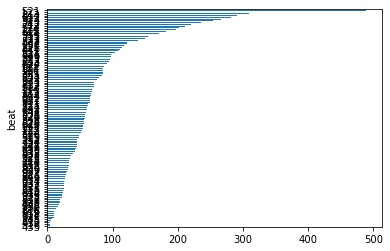

In [8]:
df_police.groupby('beat').size().sort_values().plot(kind='barh')

In [9]:
## The bar graph is hard to see so I instead plot using a histogram below. The distribution is a skewed one, where a few beat areas have most of the calls for police. There is one beat in particular that was more than any other by a decent amount.



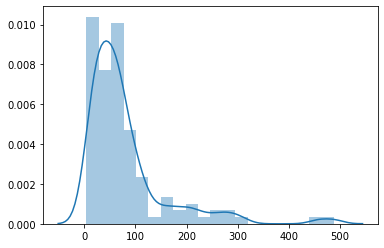

In [10]:
sns.distplot(df_police.groupby('beat').size().sort_values())

In [11]:
## I then group up the park data’s beats and see how much they correlate with the police dataset. These graphs display the amount of calls for police in each beat. From these graphs, it appears as though there is rarely any calls for police in these areas as compared to other areas.



In [12]:
df_parks.groupby('beat').size().sort_values()

beat
312    1
826    1
233    1
234    1
241    1
814    1
616    1
322    1
325    1
813    1
614    2
626    2
712    2
438    2
311    2
122    2
721    2
621    2
113    3
835    3
442    4
436    4
124    4
531    4
934    4
242    5
dtype: int64

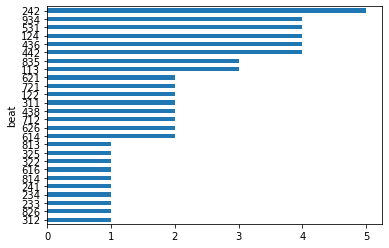

In [13]:
df_parks.groupby('beat').size().sort_values().plot(kind='barh')

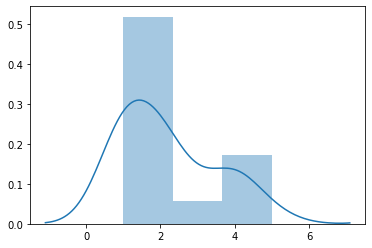

In [14]:
sns.distplot(df_parks.groupby('beat').size().sort_values())

In [15]:
## The bar graph and the histogram for the parks show a bimodal distribution, and the amount of calls for police are much lower in these areas.


In [16]:
## I am curious now to sort by high priority. Priorities 0,1, and 2 are high priority calls for the police department.
df_police = df_police[(df_police.priority == 0) | (df_police.priority == 1) | (df_police.priority == 2)]
df_police.groupby('beat').size().sort_values()

beat
435      3
812      4
316      4
439      4
245      6
      ... 
524    189
813    199
627    211
122    313
521    339
Length: 123, dtype: int64

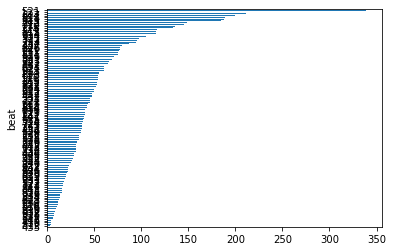

In [17]:
## It actually appears that the data does not change much with removing all non-emergency police calls. Both the graphs appear the same as before removing all non emergency calls for police, which suggests most calls for police are emergency in nature.
df_police.groupby('beat').size().sort_values().plot(kind='barh')

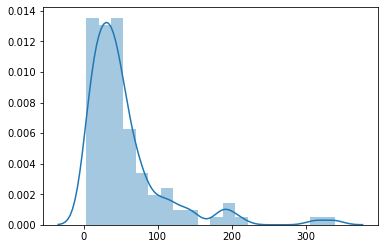

In [18]:
sns.distplot(df_police.groupby('beat').size().sort_values())

In [ ]:
##  This scatter plot for the park data shows the location data for where all the parks are. A lot of them seem to be in the same area.

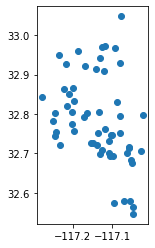

In [19]:
df_parks.plot()

In [ ]:
## There are a few beat areas that are lower or higher than most other areas, but they are not very far away to skew the data much. I used a few analytical approaches. One of them that I used was causal, to see whether parks being in a beat area helped determine calls for police. I used this analytical approach because I was most interested in determining if there was an effect on each other. Another type of analysis I did was inferential, as I tried to determine if only analyzing emergency calls for police would affect the results. I did this because simple non-emergency calls are less of a good determinator than emergency calls. Another analysis I used was exploratory, as I used these particular datasets given to see if my hypothesis was correct. I used this approach as creating new datasets for this type of scenario would be difficult to create. 
## The results I got are that there does seem to be a correlation between park location and criminal activity. The beat areas with parks had drastically lower calls for police, with the highest number being 5 calls for the beat code 242. 
## My interpretation is that the presence of parks do seem to have an impact on criminal activity. There is a marked difference in the amount of calls in areas with parks and areas with no parks.


# Ethics & Privacy

The data I used is all publicly available information from San Diego parks and recreation and the San Diego police department. There may be some privacy concerns with the police dataset, as there is information on the incident number, the exact location of where it occurred and the call type. I removed all of this information however, so there should not be any privacy concerns with the data that I use for my results. Other than that, this is all publicly available information so there should be no terms of use that I need to comply with.

The only potential bias that I can think of is that potentially the police may have written a priority number that is different than it actually was, for a variety of different reasons. The area the call for police came from and the location of the park are all facts that should not have any sort of bias. Unless however, the police recorded the location of the call in a different spot than it actually occurred. 


# Conclusion & Discussion

This project was about determining if San Diego parks deter crime in the area. To do this, I used the dataset for San Diego park location and the dataset for calls for police in 2019. The types of analysis I did was to explore the datasets provided to determine if they supported my hypothesis about parks or not. I also used causal and inferential analysis to determine if changing the datasets to only have certain types of beat calls would change the results. 

My analysis concluded that there is a correlation between park location and amount of crime, and it appears as though parks do actually deter crime from happening. Areas with parks in them are the places with the lowest amounts of calls for police out of all beat areas. 

However, I know that there are a few flaws to my analysis. One, is that I converted beats to zip codes and did the analysis that way, as I did not know how to properly compare beats to zip codes. The way I did it was to convert beats to zip codes, which is a tedious process. Due to my inability to correctly map the police beat data onto the park data, I simply just cast a wide net and changed the zip codes to beat data. As I used a map from the San Diego police department to determine which beats the zip codes lie in, there could be some clerical errors involved in the process. Another limitation is that I do not know exactly how far these calls for police are happening from the park, there could be a call for police at the edge of a beat, which could be actually close to a park. I simply know that they are in separate districts. If I could better analyze the exact distance from the park, the results would be more sound. Also another limitation is that some of the places with parks, the whole beat area is a park, or the beat area encompasses largely places with not many people. These areas with parks and not a lot of residents could skew the results and show that parks deter criminal activity, when actually it is due to the fact that there are simply not a lot of people there. As a conclusion, I would like to analyze these datasets again, however with a better method on how to properly analyze these results, so as to better determine whether or not parks actually deter crime.
If these results are true, there would be a large impact on society I believe. If parks actually do deter crime, the solution would be to have more parks. 
